In [1]:
import glob
import matplotlib
import numpy as np
import os
%matplotlib inline

data_dir = "../data/"
features = ["strf", "jtfs"]

X = {feat: [] for feat in features}
N = 4096

for feat in features:
    for n in range(N):
        x = np.load(os.path.join(data_dir, feat, "{}.npy".format(n)))
        if feat=="strf":
            x = x.ravel()
        X[feat].append(x)

    X[feat] = np.stack(X[feat], axis=0)

In [2]:
cmap = np.load(os.path.join(data_dir, "cmap.npy"))

In [3]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

def plot_isomap(Y, cmap):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.scatter3D(Y[:, 0], Y[:, 1], Y[:, 2], c=cmap[0], cmap='bwr');
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    
    # f modulator
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.scatter3D(Y[:, 0], Y[:, 1], Y[:, 2], c=cmap[1], cmap='bwr');
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    # chirp rate
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.scatter3D(Y[:, 0], Y[:, 1], Y[:, 2], c=cmap[2], cmap='bwr');
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

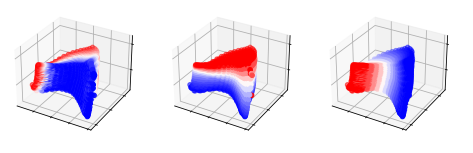

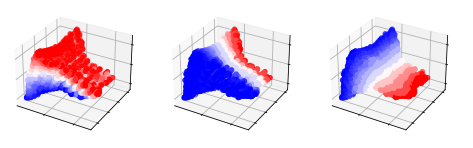

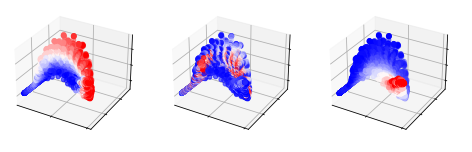

In [106]:
from sklearn.manifold import Isomap
X["ol3"] = np.load("../data/openl3.npy")

models = {}
Y = {}
ratios = {}

for feat in ["jtfs", "ol3", "strf"]:
    models[feat] = Isomap(n_components=3, n_neighbors=40)
    Y[feat] = embedding.fit_transform(X[feat])
    plot_isomap(Y[feat], cmap.T)
    knn = embedding.nbrs_.kneighbors()
    ratios[feat] = np.vstack([
        np.exp(np.mean(np.log(cmap[knn[1][i, :], :]), axis=0)) / cmap[i, :]
        for i in range(N)
    ])

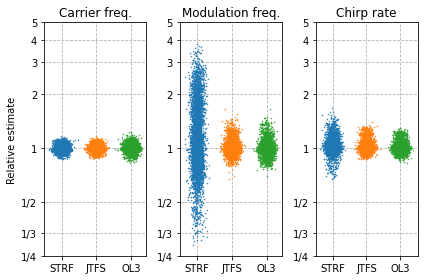

In [108]:
from fractions import Fraction
yticklabels = ["1/4", "1/3", "1/2", "1", "2", "3", "4", "5"]
objs = ["Carrier freq.", "Modulation freq.", "Chirp rate"]

for obj in range(3):
    plt.subplot(1, 3, 1+obj)
    plt.plot(np.random.randn(N)*0.1, np.log2(ratios["strf"][:, obj]), ".", markersize=1)
    plt.plot(1+np.random.randn(N)*0.1, np.log2(ratios["jtfs"][:, obj]), ".", markersize=1)
    plt.plot(2+np.random.randn(N)*0.1, np.log2(ratios["ol3"][:, obj]), ".", markersize=1)
    plt.yticks(np.log2(np.array([float(Fraction(label)) for label in yticklabels])))
    plt.xticks([0, 1, 2])
    plt.gca().set_xticklabels(["STRF", "JTFS", "OL3"])
    plt.gca().set_yticklabels(yticklabels)
    plt.grid(linestyle="--")
    plt.title(objs[obj])
    if obj==0:
        plt.ylabel("Relative estimate")
    
plt.tight_layout()

In [102]:
X["ol3"].shape

(4096, 6144)

In [103]:
X["jtfs"].shape

(4096, 8141)

In [105]:
X["strf"].shape

(4096, 22656)